## Netflix prize dataset

### Importing the necessary libraries for importing the dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Reading dataset file
netflix_dataset = pd.read_csv("/content/combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [12]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
662483,1424939,4.0
662484,1509256,1.0
662485,1513088,4.0
662486,2086634,3.0


In [13]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [14]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [15]:
netflix_dataset.shape

(662488, 2)

# EDA(Exploratory data  analysis)

In [16]:
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id      0
Rating     175
dtype: int64

In [17]:
customer_count=netflix_dataset['Cust_Id'].nunique()

In [18]:
customer_count

244908

In [19]:
#without NaN values
customer_count=netflix_dataset['Cust_Id'].nunique()-movie_count
customer_count

Cust_Id    244908
Rating     244733
dtype: int64

In [20]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

Cust_Id    662488
Rating     662313
dtype: int64

In [21]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [22]:
stars

,count
Rating,
1.0,31314
2.0,64654
3.0,184810
4.0,232420
5.0,149115


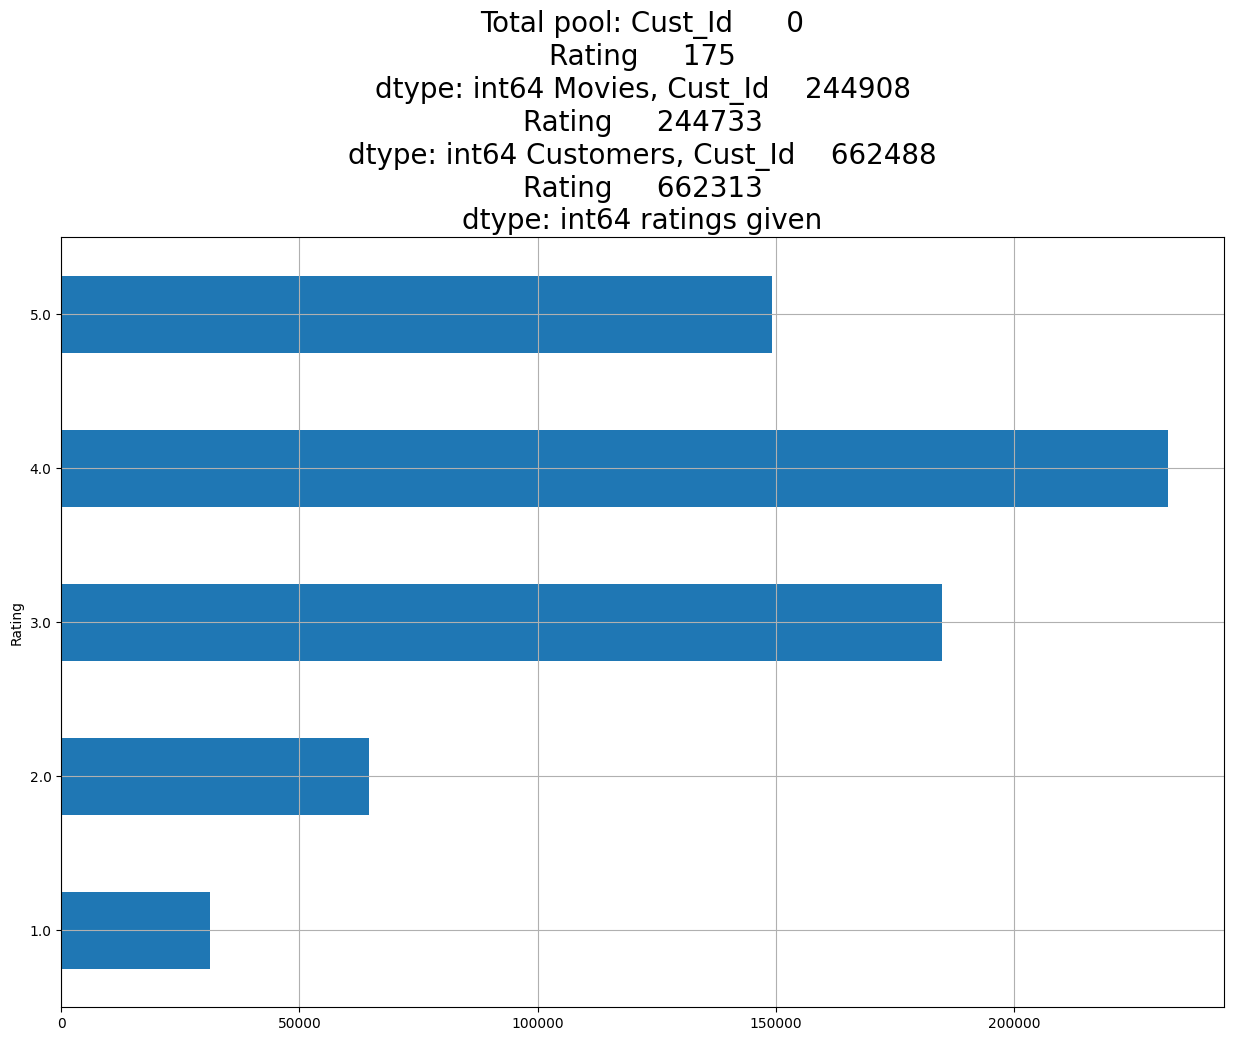

In [23]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [24]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [25]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
662483,False
662484,False
662485,False
662486,False


In [26]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
568606,True
574797,True
575120,True
577357,True


In [27]:
df_nan.shape

(175, 1)

In [28]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [29]:
df_nan.tail()

,Rating
568606,True
574797,True
575120,True
577357,True
577549,True


In [30]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()

In [31]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
170,568606,True
171,574797,True
172,575120,True
173,577357,True


In [32]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1
    #movie_id=movie_id+1


In [33]:
df_nan.iloc[-1, 0]

577549

In [34]:
len(netflix_dataset)

662488

In [35]:
# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(netflix_dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [  1.   1.   1. ... 175. 175. 175.]
Length: 662313


In [36]:
len(netflix_dataset)

662488

In [37]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
662483,1424939,4.0
662484,1509256,1.0
662485,1513088,4.0
662486,2086634,3.0


In [38]:
df_nan['index'][1:]

1         548
2         694
3        2707
4        2850
5        3991
        ...  
170    568606
171    574797
172    575120
173    577357
174    577549
Name: index, Length: 174, dtype: int64

In [39]:
df_nan['index'][:-1]

0           0
1         548
2         694
3        2707
4        2850
        ...  
169    568390
170    568606
171    574797
172    575120
173    577357
Name: index, Length: 174, dtype: int64

In [40]:
len(netflix_dataset)

662488

In [41]:
x=zip(df_nan['index'][1:], df_nan['index'][:-1])

In [42]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [43]:
temp=np.full((1,200), 1) #(shape, fill_value)

In [44]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [45]:
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['Movie_Id']=movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


<ipython-input-45-cdbbe0cd23c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id']=movie_np.astype(int)
<ipython-input-45-cdbbe0cd23c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [46]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
662483,1424939,4.0,175
662484,1509256,1.0,175
662485,1513088,4.0,175
662486,2086634,3.0,175
662487,407448,5.0,175


In [47]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [48]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id').agg(f)

#benchmark

In [49]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
171         6190  1.309990e+06   6190  3.742488
172          322  1.414031e+06    322  3.127329
173         2236  1.319507e+06   2236  3.538909
174          191  1.375856e+06    191  3.319372
175        84938  1.321579e+06  84938  4.002378

[175 rows x 4 columns]

In [50]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(f)

In [51]:
dataset_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
171,6190,3.742488
172,322,3.127329
173,2236,3.538909


In [52]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [53]:
dataset_movie_summary["count"].quantile(0.7)

1240.6

In [54]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1241.0

In [55]:
dataset_movie_summary['count']

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
       ...  
171     6190
172      322
173     2236
174      191
175    84938
Name: count, Length: 175, dtype: int64

In [56]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([  1,   2,   4,   5,   6,   7,   9,  10,  11,  12,
       ...
       159, 160, 161, 162, 163, 164, 169, 170, 172, 174],
      dtype='int64', name='Movie_Id', length=122)

In [57]:
#now we will remove all the users that are in-active
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary

,count,mean
Cust_Id,,
6,4,3.75
7,5,4.80
10,1,3.00
42,1,4.00
59,1,2.00
...,...,...
2649388,2,3.00
2649401,2,3.50
2649404,1,4.00


In [58]:
# dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [59]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

3.0

In [60]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([     10,      42,      59,      94,     116,     131,     158,     164,
           168,     183,
       ...
       2649328, 2649331, 2649336, 2649351, 2649376, 2649378, 2649388, 2649401,
       2649404, 2649429],
      dtype='int64', name='Cust_Id', length=157568)

In [61]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (662313, 3) shape


In [62]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (416461, 3)


In [63]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [64]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
# df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
# print(df_p.shape)

In [65]:
import pandas as pd

In [66]:
df_title = pd.read_csv("/content/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [67]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [68]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162989 sha256=945a52f97d3be83e5503f4985bcafa60f40cac69e876d6611756b56f8d030e20
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


# Model building

In [69]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [70]:
#!pip install scikit-surprise

In [71]:
#help us to read the dataset for svd algo
reader=Reader()

In [72]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [73]:
svd=SVD()
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9997  0.9966  0.9968  0.9993  0.9940  0.9973  0.0021  
MAE (testset)     0.8043  0.7973  0.7974  0.8042  0.7991  0.8004  0.0032  
Fit time          2.30    2.14    3.36    6.19    5.24    3.84    1.61    
Test time         0.20    0.13    0.21    0.53    0.68    0.35    0.21    


{'test_rmse': array([0.99974018, 0.99655321, 0.99676043, 0.99932641, 0.99398608]),
 'test_mae': array([0.80433603, 0.7972796 , 0.79736633, 0.80417393, 0.79909259]),
 'fit_time': (2.2970569133758545,
  2.136622667312622,
  3.3617281913757324,
  6.185009717941284,
  5.24426007270813),
 'test_time': (0.2006664276123047,
  0.1273190975189209,
  0.2127237319946289,
  0.5255329608917236,
  0.6764812469482422)}

In [74]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [75]:
#so first we take user 712664 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]
# dataset_712664=dataset_712664.set_index('Movie_Id')
# dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175


In [76]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [77]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [78]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [79]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [80]:
user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)
user_712664=user_712664.drop('Movie_Id', axis=1)

<ipython-input-80-42d8450a9196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)


In [81]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

        Year                        Name  Estimate_Score
25    2004.0             Never Die Alone        2.425248
16    2005.0                   7 Seconds        3.035770
7     2004.0  What the #$*! Do We Know!?        3.108714
23    1981.0         My Bloody Valentine        3.415708
15    1996.0                   Screamers        3.542994
...      ...                         ...             ...
6010  1985.0            Cheers: Season 4        3.734860
29    2003.0      Something's Gotta Give        3.770821
27    2002.0             Lilo and Stitch        4.050978
17    1994.0            Immortal Beloved        4.299643
2     1997.0                   Character        4.318025

[17648 rows x 3 columns]


In [82]:
# user_712664.head(10)

In [83]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                             Name  Estimate_Score
2   1997.0                        Character        4.318025
17  1994.0                 Immortal Beloved        4.299643
27  2002.0                  Lilo and Stitch        4.050978
29  2003.0           Something's Gotta Give        3.770821
54  1995.0                             Jade        3.734860
75  1952.0            I Love Lucy: Season 2        3.734860
70  1995.0  Maya Lin: A Strong Clear Vision        3.734860
67  2004.0                      Invader Zim        3.734860
57  1996.0                      Dragonheart        3.734860
56  1995.0                      Richard III        3.734860
